In [ ]:
# In summary, SVM's superior performance is likely due to its suitability for small to medium-sized, well-structured datasets
# while MLP requires more careful tuning and sufficient data to shine.

In [ ]:
# Reasons for why SVM was the most suitable model for this

# Handwritten digits are often linearly or near-linearly separable in transformed spaces, which SVM handles well.
# If the dataset is noise-free and has a clear structure, SVM can efficiently utilize this for better accuracy.

# Less prone to overfitting with appropriate regularization (C parameter).

# Faster to train on smaller datasets since it uses fewer parameters.
# while MLP - Training a neural network can be computationally expensive, especially with many iterations and layers.

# svm - Simpler and optimized for binary or multi-class classification tasks, especially with kernel functions like RBF (Radial Basis Function).

# svm - Works well with smaller datasets and can effectively find the optimal decision boundary.
# MLP - Requires larger datasets to train effectively because it learns complex patterns through multiple layers.

In [ ]:
# Decided to go with SVM
# focus on tuning hyperparameters

In [ ]:
# scikit-learn comes with several test datasets.
# importing the hand written digit dataset
from sklearn import datasets

# digit contain the dataset
digits = datasets.load_digits()

# dir function use to display the attributes of the dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
# converting the 2 dimensional array to one dimensional array
# The input layer expects a one-dimensional array, whereas the image datasets are two-dimensional. As a result, need to flatten all images:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))

# gives the  shape of the data
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [ ]:
# Data split for training and testing

# Very first 1000 photographs and
# labels will be used in training.
x_train = x[:1000]
y_train = y[:1000]

# The leftover dataset will be utilised to
# test the network's performance later on.
x_test = x[1000:]
y_test = y[1000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1000, 64)
(1000,)
(797, 64)
(797,)


Tune hyperparameters using Grid Search

In [ ]:
# Grid search involves exhaustively searching through a predefined set of hyperparameters to find the combination that gives the best performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the model
model = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Kernel type
}

# Use GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1)
grid.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


# Print the details of the best case
best_index = grid.best_index_  # Index of the best parameter combination
print("\nBest Case Details:")
print(f"Iteration: {best_index + 1}")
print(f"Parameters: {grid.cv_results_['params'][best_index]}")
print(f"Mean Test Score: {grid.cv_results_['mean_test_score'][best_index]:.4f}")
print(f"Standard Deviation: {grid.cv_results_['std_test_score'][best_index]:.4f}")

# Print the results for each iteration
print("\nDetailed Results:")
for i in range(len(grid.cv_results_['params'])):
    print(f"Iteration {i + 1}:")
    print(f"Parameters: {grid.cv_results_['params'][i]}")
    print(f"Mean Test Score: {grid.cv_results_['mean_test_score'][i]:.4f}")
    print(f"Standard Deviation: {grid.cv_results_['std_test_score'][i]:.4f}")
    print("-" * 40)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.966

Best Case Details:
Iteration: 23
Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Mean Test Score: 0.9660
Standard Deviation: 0.0139

Detailed Results:
Iteration 1:
Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mean Test Score: 0.1040
Standard Deviation: 0.0020
----------------------------------------
Iteration 2:
Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Mean Test Score: 0.9460
Standard Deviation: 0.0208
----------------------------------------
Iteration 3:
Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Score: 0.1040
Standard Deviation: 0.0020
----------------------------------------
Iteration 4:
Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Mean Test Score: 0.9460
Standard Deviation: 0.0208
----------------------------------------
Iteration 5:
Parameters: {'C': 0.1, 'gamma': 0

In [ ]:
from sklearn import svm
# initilalize the model with best params
clf = svm.SVC(gamma=0.001, C = 10, kernel = 'rbf')


# fir the model - train the final model
clf.fit(x_train, y_train)

SVC(C=10, gamma=0.001)

In [ ]:
# Predict the value of the digit on the test subset
predictions_SVM = clf.predict(x_test)

In [ ]:
# check predicted values with actual values

print(predictions_SVM.shape)
print(y_test.shape)

print(predictions_SVM[:50])
print(y_test[:50])

(797,)
(797,)
[1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0]
[1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0]


In [ ]:
# check the accuracy
# calculating the accuracy with y_test and predictions_SVM
from sklearn import metrics
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions_SVM))
print("======================================")

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predictions_SVM)}\n")

0.9698870765370138
Classification report for classifier SVC(C=10, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        79
           1       0.99      0.95      0.97        80
           2       0.99      0.99      0.99        77
           3       0.97      0.87      0.92        79
           4       0.99      0.95      0.97        83
           5       0.95      0.99      0.97        82
           6       0.99      0.99      0.99        80
           7       0.96      1.00      0.98        80
           8       0.93      1.00      0.96        76
           9       0.94      0.98      0.96        81

    accuracy                           0.97       797
   macro avg       0.97      0.97      0.97       797
weighted avg       0.97      0.97      0.97       797




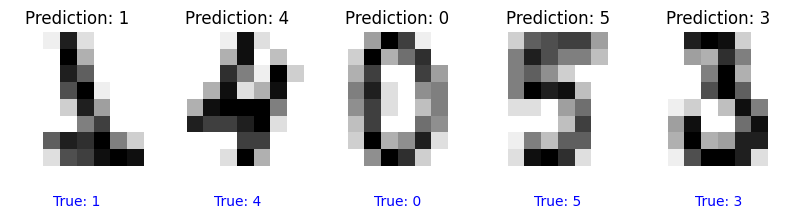

In [ ]:
# showing the predicted value for test data images
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction, true_value in zip(axes, x_test, predictions_SVM, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
    ax.text(0.5, -0.3, f'True: {true_value}', transform=ax.transAxes,
            fontsize=10, ha='center', color='blue')

Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Define the model
model = SVC()

# Define the parameter distribution
param_dist = {
    'C': uniform(0.1, 100),  # Random values for C in the range [0.1, 100]
    'gamma': uniform(0.001, 1),  # Random values for gamma
    'kernel': ['rbf', 'linear']
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, verbose=1, random_state=42)
random_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Print the results for each combination
print("\nDetailed Results:")
for i in range(len(random_search.cv_results_['params'])):
    print(f"Combination {i + 1}:")
    print(f"Parameters: {random_search.cv_results_['params'][i]}")
    print(f"Mean Test Score: {random_search.cv_results_['mean_test_score'][i]:.4f}")
    print(f"Standard Deviation: {random_search.cv_results_['std_test_score'][i]:.4f}")
    print("-" * 40)

# Print details for the best case
best_index = random_search.best_index_
print("\nBest Case Details:")
print(f"Combination: {best_index + 1}")
print(f"Parameters: {random_search.cv_results_['params'][best_index]}")
print(f"Mean Test Score: {random_search.cv_results_['mean_test_score'][best_index]:.4f}")
print(f"Standard Deviation: {random_search.cv_results_['std_test_score'][best_index]:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 78.06910002727692, 'gamma': 0.597850157946487, 'kernel': 'linear'}
Best Cross-Validation Score: 0.9460000000000001

Detailed Results:
Combination 1:
Parameters: {'C': 37.55401188473625, 'gamma': 0.9517143064099162, 'kernel': 'rbf'}
Mean Test Score: 0.1040
Standard Deviation: 0.0020
----------------------------------------
Combination 2:
Parameters: {'C': 78.06910002727692, 'gamma': 0.597850157946487, 'kernel': 'linear'}
Mean Test Score: 0.9460
Standard Deviation: 0.0208
----------------------------------------
Combination 3:
Parameters: {'C': 15.699452033620265, 'gamma': 0.05908361216819946, 'kernel': 'linear'}
Mean Test Score: 0.9460
Standard Deviation: 0.0208
----------------------------------------
Combination 4:
Parameters: {'C': 33.47086111390219, 'gamma': 0.14386681792194078, 'kernel': 'rbf'}
Mean Test Score: 0.1040
Standard Deviation: 0.0020
----------------------------------------
Combination 5

In [ ]:
clf_R= svm.SVC(gamma= 0.597850157946487, C=78.06910002727692, kernel='linear')
clf_R.fit(x_train,y_train)

SVC(C=78.06910002727692, gamma=0.597850157946487, kernel='linear')

In [ ]:
predictions_Random = clf_R.predict(x_test)

In [ ]:
# check predicted values with actual values

print(predictions_Random.shape)
print(y_test.shape)

print(predictions_Random[:50])
print(y_test[:50])

(797,)
(797,)
[1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0]
[1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0]


In [ ]:
# check the accuracy
# calculating the accuracy with y_test and predictions_SVM
from sklearn import metrics
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions_Random))
print("======================================")

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predictions_Random)}\n")

0.9422835633626098
Classification report for classifier SVC(C=10, gamma=0.001):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        79
           1       0.96      0.89      0.92        80
           2       1.00      0.99      0.99        77
           3       0.97      0.84      0.90        79
           4       1.00      0.94      0.97        83
           5       0.89      0.99      0.94        82
           6       0.98      0.99      0.98        80
           7       0.94      0.95      0.94        80
           8       0.87      0.93      0.90        76
           9       0.88      0.93      0.90        81

    accuracy                           0.94       797
   macro avg       0.94      0.94      0.94       797
weighted avg       0.94      0.94      0.94       797




Conclusion

In [ ]:
# Grid search cv gives best hyper parameters tuning for the recognizing handwritten digits

# Insights gain from this hyper parameters tuning




*   Grid Search systematically evaluates all parameter combinations in the search space. Random Search samples parameters randomly and might miss the optimal region, especially if the search space is large and the number of iterations is limited.
*   For simpler datasets (like handwritten digit recognition), the search space may not be too large, making Grid Search more feasible and effective.
Random Search is more advantageous for large, complex datasets with high-dimensional hyperparameter spaces.


*   Grid Search systematically covers the entire space, ensuring the best parameters in the given search space are found.
Random Search depends on random sampling, introducing variability that could lead to suboptimal results.
*   Random Search evaluates a fixed number of parameter combinations (n_iter).
If this number is too low, the search may not explore enough combinations to find the global optimum, unlike Grid Search, which exhaustively evaluates all combinations.


*   Recognition of handwritten digits often benefits from specific ranges of hyperparameters.
Grid Search may have better captured the interaction between C and gamma parameters because of its exhaustive approach, especially for nonlinear kernels like RBF.











